In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Inspect data on each table to know the data further
inspector = inspect(engine)

measurement_col = inspector.get_columns('measurement')
print("Measurement")
for x in measurement_col:
    print(x['name'],x['type'])
    
stations_col = inspector.get_columns('station')
print("\nStations")
for y in stations_col:
    print(y['name'],y['type'])

Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Stations
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
ld = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(ld)




('2017-08-23',)


In [14]:
# Calculate the date 1 year ago from the last data point in the database
nw = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Date 1 Year Ago from the last data point:", nw)

Date 1 Year Ago from the last data point: 2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
d_p_s = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= nw).all()
for x in d_p_s:
    print(x)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-11-25', 1.03)
('2016-11-26', 0.3)
('2016-11-27', 0.29)
('2016-11-28', 0.69)
('2016-11-29', 0.2)
('2016-11-30', 0.79)
('2016-12-01', 0.72)
('2016-12-02', 1.27)
('2016-12-03', 1.62)
('2016-12-04', 0.31)
('2016-12-05', 1.6)
('2016-12-06', 0.0)
('2016-12-07', 0.02)
('2016-12-08', 0.03)
('2016-12-09', 0.42)
('2016-12-10', 0.04)
('2016-12-11', 0.13)
('2016-12-12', 0.01)
('2016-12-13', 0.09)
('2016-12-14', 0.33)
('2016-12-15', 0.03)
('2016-12-16', 0.0)
('2016-12-18', None)
('2016-12-19', 0.15)
('2016-12-20', 0.0)
('2016-12-21', 0.55)
('2016-12-22', 1.24)
('2016-12-23', 0.83)
('2016-12-24', 1.08)
('2016-12-25', 0.38)
('2016-12-26', 1.48)
('2016-12-27', 0.14)
('2016-12-28', 0.14)
('2016-12-29', 1.03)
('2016-12-30', 2.37)
('2016-12-31', 0.9)
('2017-01-01', 0.03)
('2017-01-02', 0.0)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.47)
('2017-01-06', 0.1)
('2017-01-07', 0.0)
('2017-01-08', 0.03)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-12', 0.0)
('2017-0

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(d_p_s, columns = ['Date','Precipitation'])
Precip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
Precip_df = Precip_df.sort_values(['Date'])
Precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


Text(0, 0.5, 'Precipitation Score')

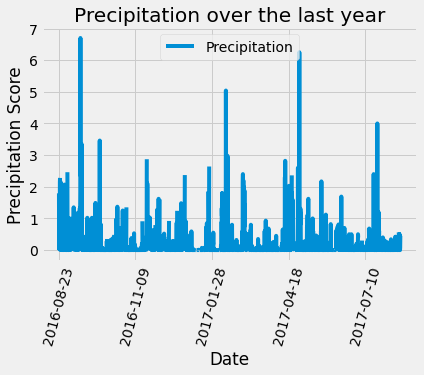

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
Precip_plot = Precip_df.plot(rot=75)
Precip_plot.set_title("Precipitation over the last year")
Precip_plot.set_ylabel("Precipitation Score")

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?
Available_Sta = session.query(Station.id).count()
print(Available_Sta)

9


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Activity_Sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
Activity_Sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Station = 'USC00519281'
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == Station).all()

[(54.0, 85.0, 71.66378066378067)]

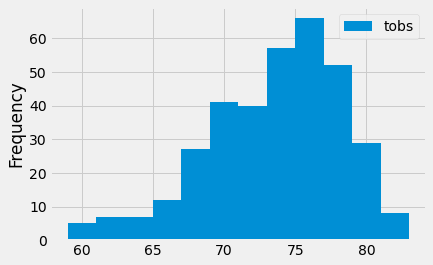

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Station_Data = Activity_Sta[0][0]

Retrieve = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").filter(Measurement.station == Station_Data).all()

# Create a DataFrame
Retrieve_df = pd.DataFrame(Retrieve)

# Histogram with 12 bins
Retrieve_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
